## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

### Open datasets
          
* Resources for open data
  * https://data.boston.gov/
  * https://www.data.gov/
  * https://www.bls.gov/data/
  * http://www.fao.org/statistics/databases/en/
  * http://ec.europa.eu/eurostat/web/main
  * https://github.com/awesomedata/awesome-public-datasets
  * https://www.kdnuggets.com/2016/05/top-10-datasets-github.html
  * https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [547]:
#########DATA EXTRACTION#########
import requests
result = requests.get('https://github.com/awesomedata/awesome-public-datasets/blob/master/Datasets/titanic.csv.zip?raw=true')
with open('titanic.csv.zip','wb') as fout:
    fout.write(result.content)

from zipfile import ZipFile
zip_file = ZipFile('./titanic.csv.zip')
zip_file.extract('titanic.csv')
test_df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527175998&Signature=BuW55JYlwhEw9BaOybFsbDL0woBebVoQ%2BE2tZ8e5J9Ft8WpLEOIkzcoOI2lzjzgiq4%2BvjVy0hYZsS7EYcCM%2FXh5bAmNrLvmQzUJPbp4Sq9eHUi7C4Z9y5qanZXgaPpTS79BLer54hExZ8cbdRtOlfygF7dzJWwJjRHXyjjtV7cQyI7C8naRyDy8oN8aL842biKQ9Wn4IZbonU7FTosj38Kp528sxN6aB8PuXPNfnBf%2FYgDjOh762pkoFg7VZhOD3BeVqx3O8Dw04Qi83g35Zn0DBl8nB88JFnX09FSVrs9Q7yMHEqQCz2J%2BgsETgt%2FQ2Yyv42EDqhmbi%2FLrv1lD2Zg%3D%3D', header=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The dataset is of RMS Titanic which sank after colliding with an iceberg and luckily some people survived. 
The dataset consists of data for each passenger such as passenger_id, age, gender(sex), survived, fare, cabin,embarked, parch: defines family relation parent=father mother child=daughter son stepbrother stepsister. 
Some children who travelled only with nanny parch=0
sisp: Number of siblings or spouses
pclass: A proxy for socio-economic status (SES): 1 = Upper,2 = Middle,3 = Lower

        
The aim of the project is to analyse the data for surviving passengers. To determine a suitable predictive model for the surviving passengers and also to observe if there is any relationship among other elements of the dataset and the passengers who survived/died. How is 'Survied' related to other attributes?

In [549]:
dataset = pd.read_csv('titanic.csv')
dataset.head()
#data.describe()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [550]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [551]:
######################DATA CLEANUP######################

#finding null values if any
null_columns = dataset.columns[dataset.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [552]:
#count of null values

dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [553]:
#replace the missing values by median of Age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [554]:
#similarly filling Embarked values by most repeating value
dataset['Embarked'].describe()
repeating_value='S'
dataset['Embarked'] = dataset['Embarked'].fillna(repeating_value)

In [555]:
#Since there are 687 missing values for cabin feature, dropping it
dataset = dataset.drop(['Cabin'], axis=1)


In [556]:
#Similaryly performing Data cleaning for test data
#replace the missing values by median of the Age
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
#Dropping cabin for test_df for later use
test_df = test_df.drop(['Cabin'], axis=1)
test_df.info()
#Replacing one missing value for fare by mean
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


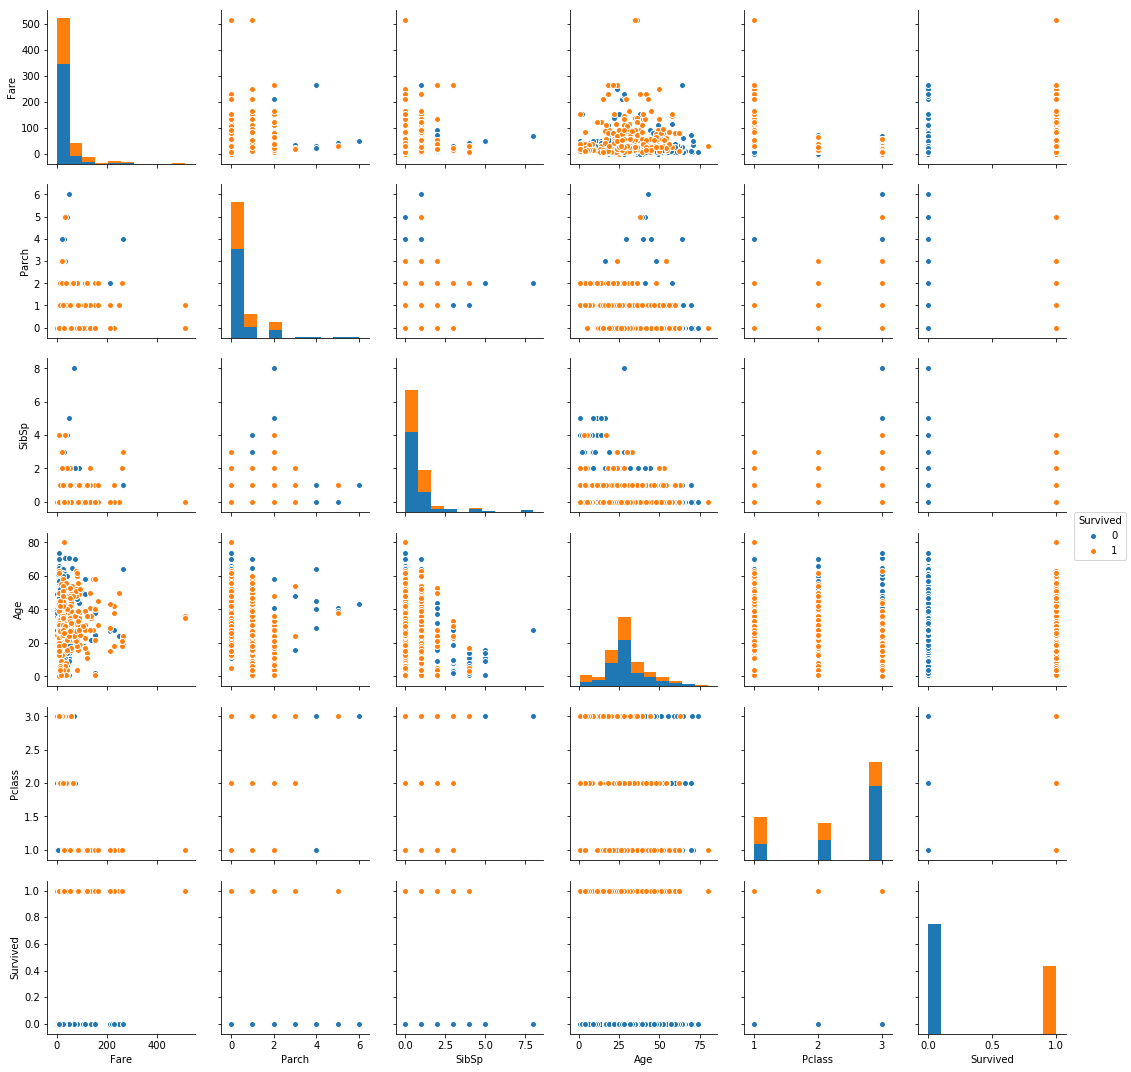

In [557]:
sns.pairplot(data=dataset[["Fare","Parch","SibSp","Age","Pclass","Survived","Embarked"]],
             hue="Survived")
#This is pair wise relationship using pairplot, we can see the distribution of each element as to relationship with
#the people survived. Here, we get a rough estimate to proceed with our findings.

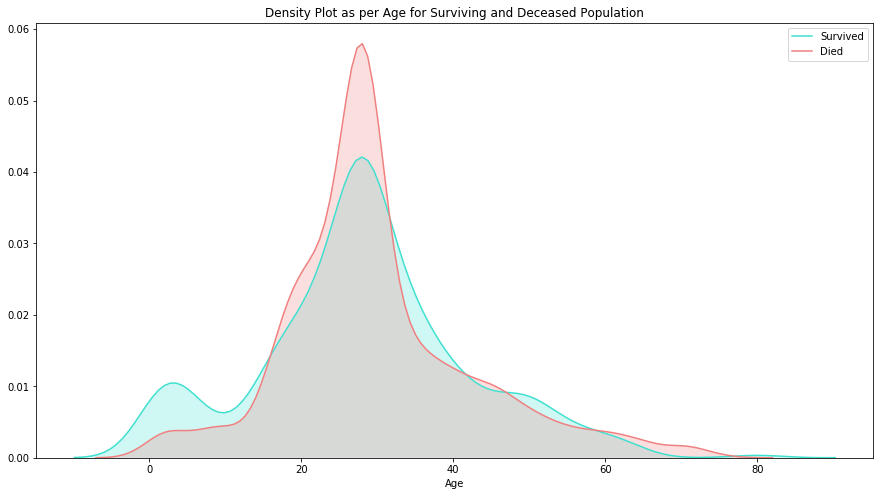

In [558]:
######################DATA VISUALIZATION######################
plt.figure(figsize=(15,8))
sns.kdeplot(dataset["Age"][dataset.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(dataset["Age"][dataset.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.xlabel("Age")
plt.title('Density Plot as per Age for Surviving and Deceased Population')
plt.show()

In [559]:
#It can be infered that the survival class belong to young adults in between 20 to 40 years of age. Also there is peak in the distribution for the survived passengerss who seem to be children or infants.

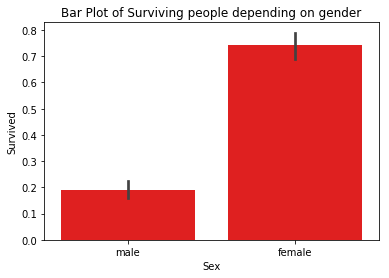

In [560]:
sns.barplot('Sex', 'Survived', data=dataset, color="red")
plt.title('Bar Plot of Surviving people depending on gender')
plt.show()

Text(0.5,1,'Bar Plot of Surviving people depending on class')

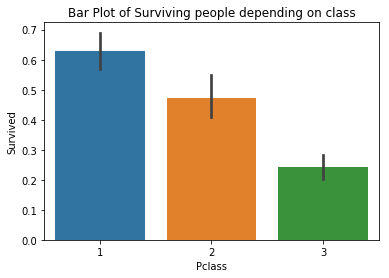

In [561]:
sns.barplot(x='Pclass', y='Survived', data=dataset)
plt.title('Bar Plot of Surviving people depending on class')


In [562]:
#From the above two bar plots, we see that that females and upper class people were large in number amongst the survivors.

Text(0.5,1,'Analysis of people with Age')

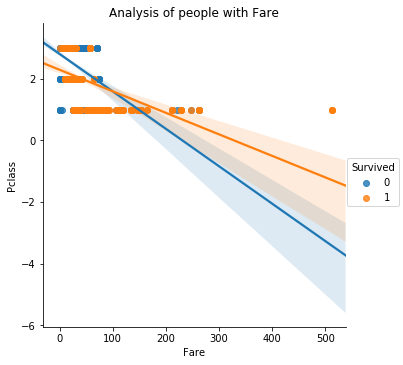

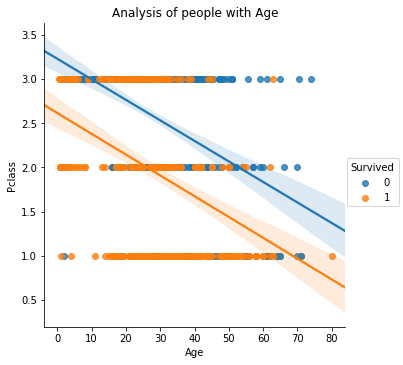

In [563]:
######################DESCRIPTIVE/PREDICTIVE ANALYTICS######################


sns.lmplot(x ='Fare', y ='Pclass', data = dataset, hue = 'Survived')
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.title("Analysis of people with Fare")

sns.lmplot(x ='Age', y ='Pclass', data = dataset, hue = 'Survived')
plt.xlabel("Age")
plt.ylabel("Pclass")
plt.title("Analysis of people with Age")


In [564]:
#From the above lm plots we observe that people paying higher fare usually belong to Upper socio-economic class.
#Also, these are the people who's survival rate is more than the lower class people. It seems they were given more 
#advantage than rest by supplying survival equipments,etc.

In [565]:
dataset.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [566]:
Y_train = dataset["Survived"]


dataset = dataset.drop(['Survived','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)



In [567]:
dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [568]:

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [569]:
#converting gender to numeric data-type
genders = {"male": 0, "female": 1}
data = [dataset, test_df]

for a in data:
    a['Sex'] = a['Sex'].map(genders)  
    
dataset.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


In [570]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [571]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(dataset, Y_train)

Y_pred = logreg.predict(test_df)

print(logreg.score(dataset, Y_train))

0.797979797979798


In [572]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(dataset, Y_train)

Y_pred = gaussian.predict(test_df)

print(gaussian.score(dataset, Y_train))

0.792368125701459


In [573]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(dataset, Y_train)

Y_prediction = random_forest.predict(test_df)

random_forest.score(dataset, Y_train)
print(random_forest.score(dataset, Y_train))

1.0


In [574]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(dataset, Y_train)

Y_pred = knn.predict(test_df)
print(knn.score(dataset, Y_train))

0.8013468013468014


By observing the machine learning methods, I think Random Forest is the most accurate one for our dataset.
This capstone project helped me learn many new techniques which I came across only while handling the dataset used in this project. I thanks prof for helping us learn throughout the course by providing video material along with the usual lecture. It helped a lot to do the assignments and project. I have used matplotlib and Seaborn libraries for visualization. Along with it I have made use of diiferent methods of sklearn for determing the best model suitable for predicting the survival of the passengers.

Reference: 
        https://www.kaggle.com/c/titanic
        https://github.com/awesomedata/awesome-public-datasets/tree/master/Datasets